<a href="https://colab.research.google.com/github/sandeepangh782/ML-21CSC307P/blob/main/cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import warnings

warnings.filterwarnings('ignore')

In [19]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv(r'/content/gdrive/MyDrive/Multivariate/breast_cancer.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
# view dimensions of dataset

df.shape

(683, 11)

In [21]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [22]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion',
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

df.columns = col_names

df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [23]:
# let's agian preview the dataset

df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
# drop Id column from dataset

df.drop('Id', axis=1, inplace=True)

In [25]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              683 non-null    int64
 1   Uniformity_Cell_Size         683 non-null    int64
 2   Uniformity_Cell_Shape        683 non-null    int64
 3   Marginal_Adhesion            683 non-null    int64
 4   Single_Epithelial_Cell_Size  683 non-null    int64
 5   Bare_Nuclei                  683 non-null    int64
 6   Bland_Chromatin              683 non-null    int64
 7   Normal_Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [26]:
for var in df.columns:

    print(df[var].value_counts())

1     139
5     128
3     104
4      79
10     69
2      50
8      44
6      33
7      23
9      14
Name: Clump_thickness, dtype: int64
1     373
10     67
3      52
2      45
4      38
5      30
8      28
6      25
7      19
9       6
Name: Uniformity_Cell_Size, dtype: int64
1     346
10     58
2      58
3      53
4      43
5      32
7      30
6      29
8      27
9       7
Name: Uniformity_Cell_Shape, dtype: int64
1     393
3      58
2      58
10     55
4      33
8      25
5      23
6      21
7      13
9       4
Name: Marginal_Adhesion, dtype: int64
2     376
3      71
4      48
1      44
6      40
5      39
10     31
8      21
7      11
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
3     161
2     160
1     150
7      71
4      39
5      34
8      28
10     20
9      11
6       9
Name: Bland_Chromatin, dtype: int64
1     432
10     60
3      

In [27]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

In [28]:
df.dtypes

Clump_thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [29]:
# check missing values in variables

df.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [30]:
# check frequency distribution of `Bare_Nuclei` column

df['Bare_Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [31]:
# check unique values in `Bare_Nuclei` column

df['Bare_Nuclei'].unique()

array([ 1, 10,  2,  4,  3,  9,  7,  5,  8,  6])

In [32]:
# check for nan values in `Bare_Nuclei` column

df['Bare_Nuclei'].isna().sum()

0

In [33]:
# view frequency distribution of values in `Class` variable

df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [34]:
# view percentage of frequency distribution of values in `Class` variable

df['Class'].value_counts()/np.float(len(df))

2    0.650073
4    0.349927
Name: Class, dtype: float64

In [35]:
# view summary statistics in numerical variables

print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           683.00                683.00                 683.00   
mean              4.44                  3.15                   3.22   
std               2.82                  3.07                   2.99   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             683.00                       683.00       683.00   
mean                2.83                         3.23         3.54   
std                 2.86                         2.22         3.64   
min                 1.00                         1.00         1.00   
25%       

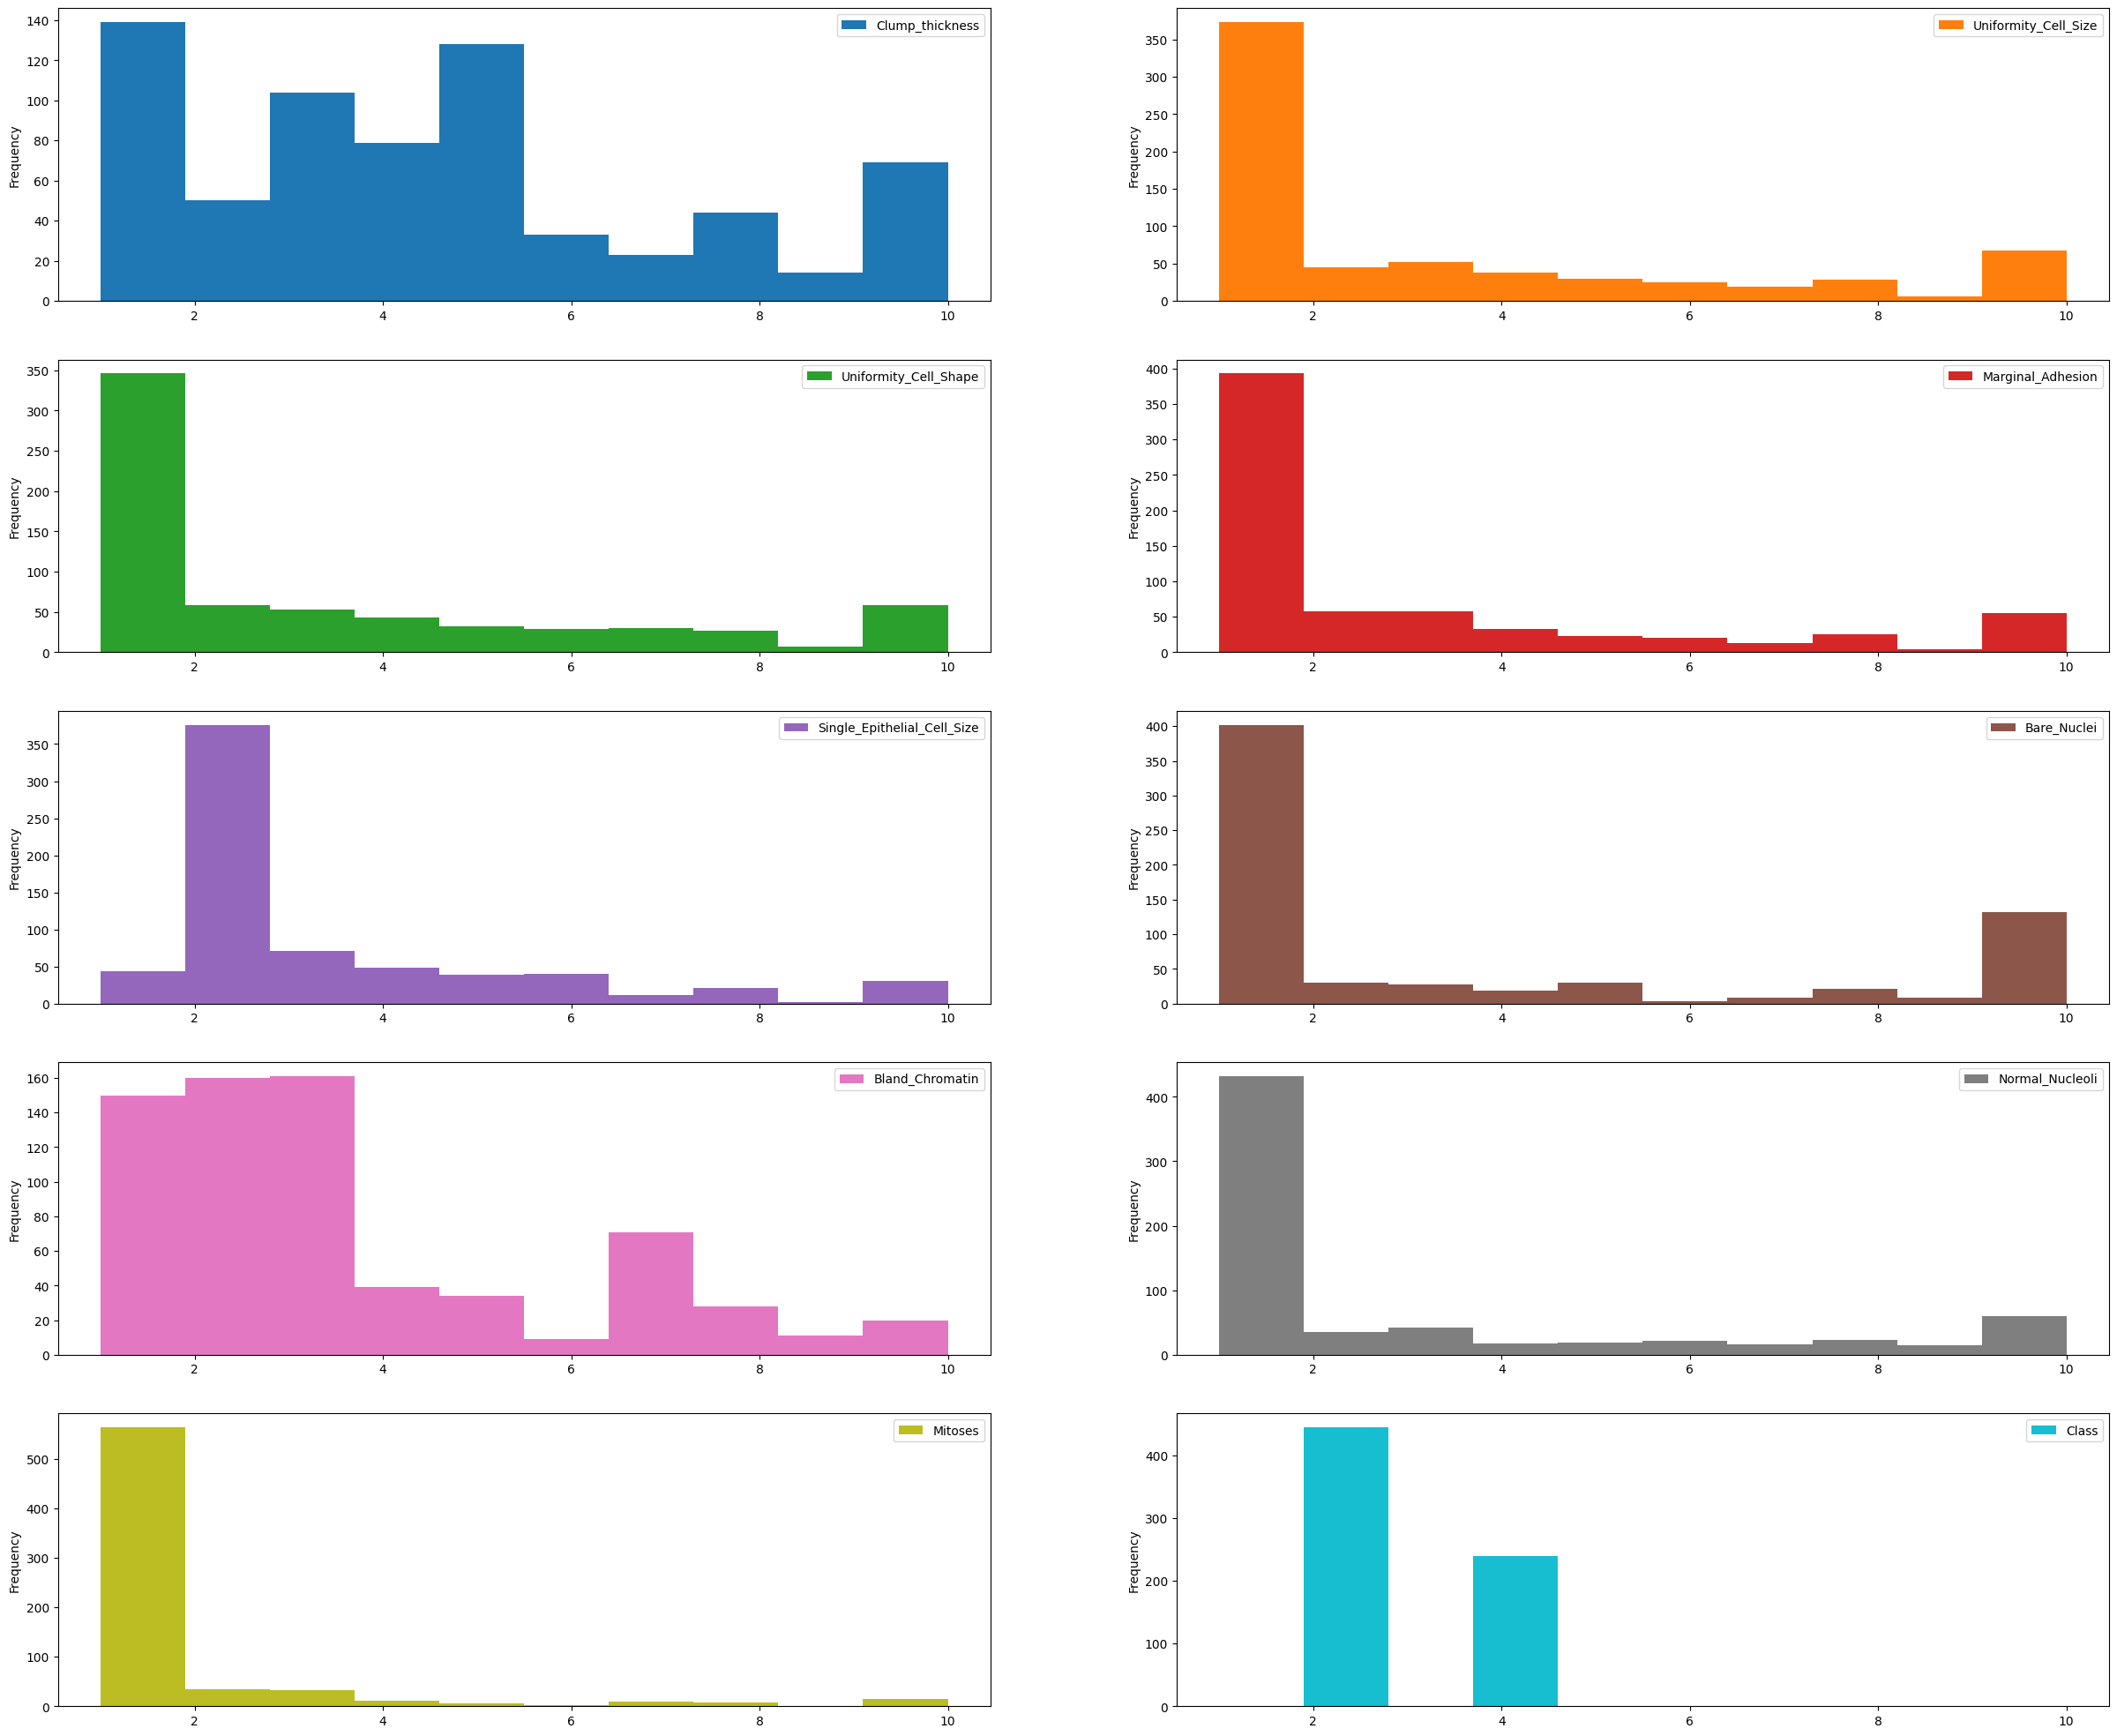

In [36]:
# plot histograms of the variables


plt.rcParams['figure.figsize']=(30,25)

df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)

plt.show()

In [37]:
correlation = df.corr()

In [38]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.821891
Uniformity_Cell_Size           0.820801
Bland_Chromatin                0.758228
Normal_Nucleoli                0.718677
Clump_thickness                0.714790
Marginal_Adhesion              0.706294
Single_Epithelial_Cell_Size    0.690958
Mitoses                        0.423448
Name: Class, dtype: float64

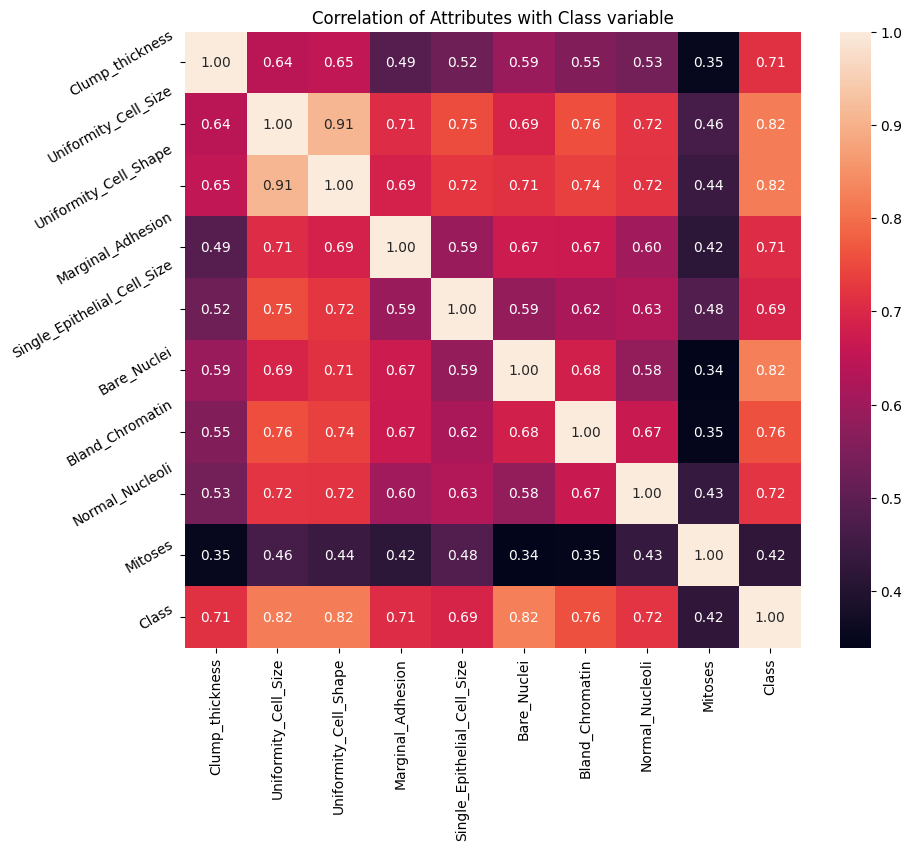

In [39]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [40]:
X = df.drop(['Class'], axis=1)

y = df['Class']

In [41]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape


((546, 9), (137, 9))

In [43]:
# check data types in X_train

X_train.dtypes

Clump_thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
dtype: object

In [44]:
# check missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [45]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [46]:
# print percentage of missing values in the numerical variables in training set

for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

In [47]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [48]:
# check again missing values in numerical variables in X_train

X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [49]:
# check missing values in numerical variables in X_test

X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [50]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
312,10,1,1,1,2,10,5,4,1
202,1,1,1,1,1,1,3,1,1
263,5,1,1,1,2,1,3,1,1
395,3,1,2,1,2,1,2,1,1
101,8,2,3,1,6,3,7,1,1


In [51]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
113,1,1,1,1,2,5,1,1,1
378,3,1,1,1,2,1,2,1,1
303,5,5,5,2,5,10,4,3,1
504,4,7,8,3,4,10,9,1,1
301,1,1,1,1,2,1,1,1,1


In [52]:
cols = X_train.columns

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [55]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [56]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,1.988395,-0.697811,-0.741526,-0.633637,-0.548720,1.815536,0.619074,0.345321,-0.338637
1,-1.224684,-0.697811,-0.741526,-0.633637,-0.997897,-0.682796,-0.188607,-0.621578,-0.338637
2,0.203351,-0.697811,-0.741526,-0.633637,-0.548720,-0.682796,-0.188607,-0.621578,-0.338637
3,-0.510666,-0.697811,-0.404973,-0.633637,-0.548720,-0.682796,-0.592447,-0.621578,-0.338637
4,1.274378,-0.372444,-0.068420,-0.633637,1.247988,-0.127611,1.426754,-0.621578,-0.338637


In [57]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_pred = knn.predict(X_test)

y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2])

In [59]:
# probability of getting output as 2 - benign cancer

knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       0.33333333, 0.        , 0.        , 0.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [60]:
# probability of getting output as 4 - malignant cancer

knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.66666667, 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [61]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9708


In [62]:
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9725


In [63]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9725
Test set score: 0.9708


In [64]:
# check class distribution in test set

y_test.value_counts()

2    87
4    50
Name: Class, dtype: int64

In [65]:
# check null accuracy score

null_accuracy = (85/(85+55))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


In [66]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn_5.fit(X_train, y_train)


# predict on the test-set
y_pred_5 = knn_5.predict(X_test)


print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9562


In [67]:
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)


# fit the model to the training set
knn_6.fit(X_train, y_train)


# predict on the test-set
y_pred_6 = knn_6.predict(X_test)


print('Model accuracy score with k=6 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_6)))

Model accuracy score with k=6 : 0.9562


In [68]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)


# fit the model to the training set
knn_7.fit(X_train, y_train)


# predict on the test-set
y_pred_7 = knn_7.predict(X_test)


print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9562


In [69]:
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)


# fit the model to the training set
knn_8.fit(X_train, y_train)


# predict on the test-set
y_pred_8 = knn_8.predict(X_test)


print('Model accuracy score with k=8 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_8)))

Model accuracy score with k=8 : 0.9562


In [70]:
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)


# fit the model to the training set
knn_9.fit(X_train, y_train)


# predict on the test-set
y_pred_9 = knn_9.predict(X_test)


print('Model accuracy score with k=9 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=9 : 0.9562


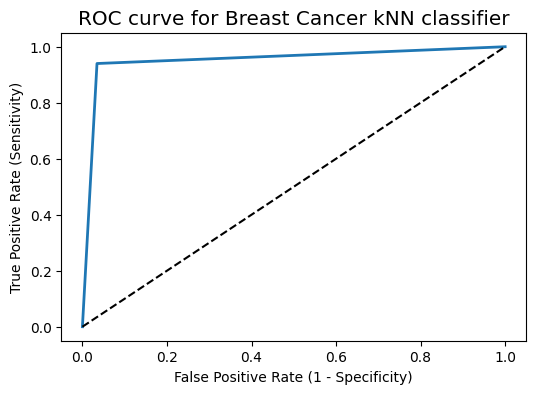

In [72]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_9, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [75]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_9)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9528


In [76]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


In [77]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.94545455 0.94545455 0.96363636 1.         0.96363636 1.
 0.98148148 0.96296296 1.         0.94444444]


In [78]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9707
